In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

# Define paths to your dataset folders
train_dir = "./Fundus Glaucoma Detection Data  [PyTorch format] dataset/train"
val_dir = './Fundus Glaucoma Detection Data  [PyTorch format] dataset/val'
test_dir = './Fundus Glaucoma Detection Data  [PyTorch format] dataset/test'

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the VGG16 model pre-trained on ImageNet without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(base_model.input, output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Disable shuffling for evaluation

# Train the model
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator,
    )

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Predict labels for the test set
predictions = model.predict(test_generator)
predicted_classes = predictions > 0.5  # Thresholding for binary classification

# Generate classification report and confusion matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.
Epoch 1/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 1314s 5s/step - accuracy: 0.6366 - loss: 0.9421 - val_accuracy: 0.7522 - val_loss: 0.5280
Epoch 2/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 2553s 9s/step - accuracy: 0.7013 - loss: 0.5758 - val_accuracy: 0.7385 - val_loss: 0.5358
Epoch 3/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 4695s 17s/step - accuracy: 0.7190 - loss: 0.5640 - val_accuracy: 0.7665 - val_loss: 0.5041
Epoch 4/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 2832s 10s/step - accuracy: 0.7276 - loss: 0.5385 - val_accuracy: 0.7094 - val_loss: 0.5341
Epoch 5/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 1069s 4s/step - accuracy: 0.7182 - loss: 0.5487 - val_accuracy: 0.7526 - val_loss: 0.5107
Epoch 6/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 1290s 5s/step - accuracy: 0.7241 - loss: 0.5470 - val_accuracy: 0.7681 - val_loss: 0.5011
Epoch 7/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 2052s 8s/step - accuracy: 0.7085 - loss: 0.5487 - val_accur

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

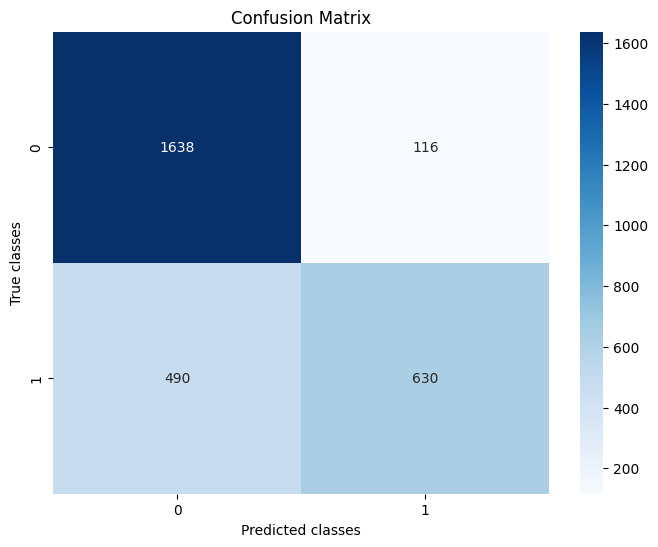

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_classes,predicted_classes), annot=True, cmap='Blues', fmt='g', 
             xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.show()

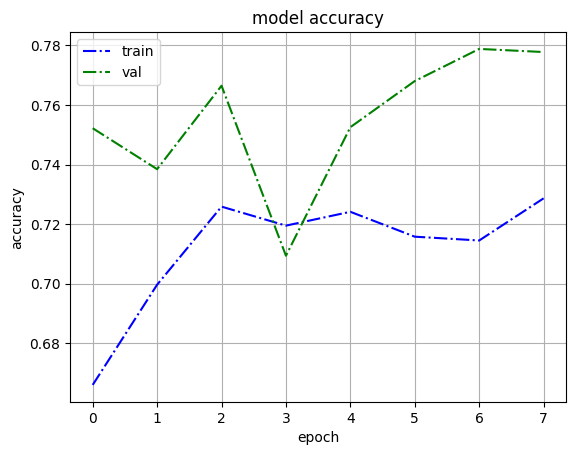

In [29]:

plt.plot(history.history['accuracy'],'b-.')
plt.plot(history.history['val_accuracy'],'g-.')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [9]:
test_generator[0][0].shape

(32, 224, 224, 3)

In [10]:
32*90

2880

In [13]:
len(test_generator.classes) 

2874

In [16]:
import warnings
import logging
import os 
warnings.filterwarnings('ignore')
logging.disable(logging.WARNING)
import numpy as np
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# Define data directories
data_dir = "./Fundus Glaucoma Detection Data  [PyTorch format] dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Define transformations for data preprocessing
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'test']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

# Define the device (GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pretrained model (e.g., ResNet-50)
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming 2 classes: with and without glaucoma

# Move the model to the appropriate device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

    return model

# Train the model
model = train_model(model, criterion, optimizer, num_epochs=10)

# Save the trained model
torch.save(model.state_dict(), 'glaucoma_detection_model.pth')


Epoch 0/9
----------
